In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import kagglehub
import joblib

path = kagglehub.dataset_download("uciml/pima-indians-diabetes-database")


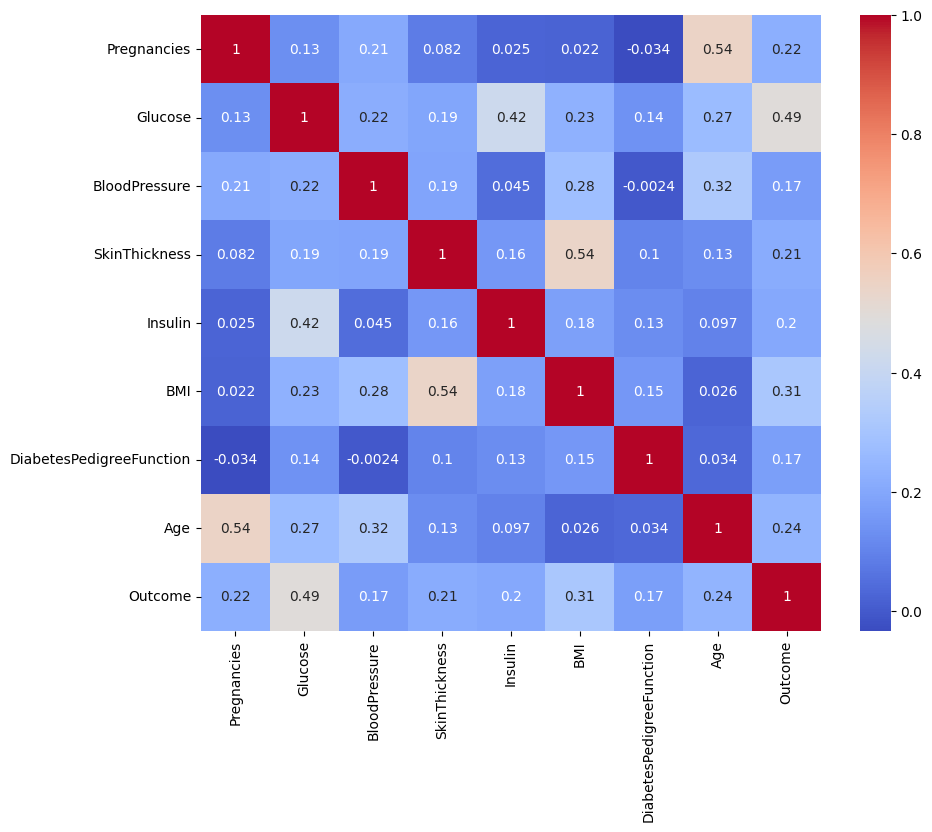

In [6]:
df= pd.read_csv("diabetes.csv")
cols_with_zero = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
df[cols_with_zero] = df[cols_with_zero].replace(0, np.nan)
df.fillna(df.median(), inplace=True)
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
X = df.drop('Outcome', axis=1)
y = df['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)



LogisticRegression(max_iter=1000)

In [18]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

y_pred = model.predict(X_test)
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred))

from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(X_train, y_train)
print("Random Forest Accuracy:", model.score(X_test, y_test))
joblib.dump(model, "diabetes_model.pkl")



Logistic Regression Accuracy: 0.7597402597402597
Random Forest Accuracy: 0.7402597402597403


['diabetes_model.pkl']

In [17]:

model = joblib.load("diabetes_model.pkl")
sample = np.array([[6, 165, 90, 35, 200, 38.0, 1.2, 50]])
prediction = model.predict(sample)
print("Diabetes Prediction:", "Yes" if prediction[0] == 1 else "No") 


Diabetes Prediction: Yes


d:\pytho3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
